Build a regression model.

In [2]:
#imports
import statsmodels.api as sm
import pandas as pd

In [217]:
df = pd.read_csv('/Users/patrick/Desktop/Lighthouse_labs/Statistical_Modeling/notebooks/model_bulding_df.csv', index_col=0)
df['bikes'] = df['ebikes'] + df['total_bikes']

In [218]:
df = df[df.reviews != 0]

In [219]:
df = df[df.reviews < 7000]

In [220]:
df.corr()

,reviews,rating,ebikes,total_bikes,bikes
reviews,1.000000,0.105794,0.163307,0.181859,0.208869
rating,0.105794,1.000000,0.074695,0.044375,0.065112
ebikes,0.163307,0.074695,1.000000,0.346531,0.677620
total_bikes,0.181859,0.044375,0.346531,1.000000,0.924661
bikes,0.208869,0.065112,0.677620,0.924661,1.000000


In [221]:
df.describe()

,reviews,rating,ebikes,total_bikes,bikes
count,3745.000000,3745.000000,3745.000000,3745.000000,3745.000000
mean,408.950868,4.035915,2.538852,10.407210,12.946061
std,623.582199,0.581366,2.826377,5.458517,6.962489
min,1.000000,1.000000,0.000000,2.000000,3.000000
25%,90.000000,4.000000,1.000000,6.000000,8.000000
50%,205.000000,4.000000,2.000000,9.000000,12.000000
75%,471.000000,4.500000,3.000000,15.000000,18.000000
max,4899.000000,5.000000,15.000000,27.000000,35.000000


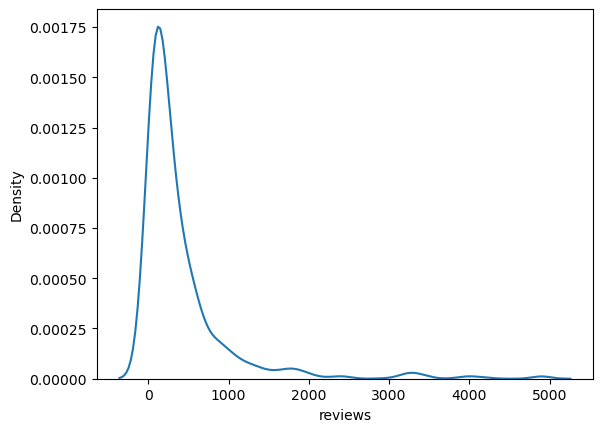

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
sns.kdeplot(data=df, x="reviews")
plt.show()

In [125]:
import numpy as np
from scipy import stats
log_reviews = np.log(df['reviews'])

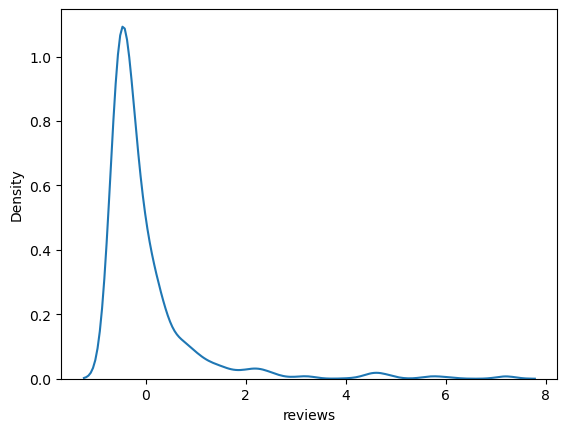

In [223]:
# normalize reviews
reviews_standardized = (df['reviews'] - df['reviews'].mean()) / df['reviews'].std()
sns.kdeplot(reviews_standardized)
plt.show()

0.0


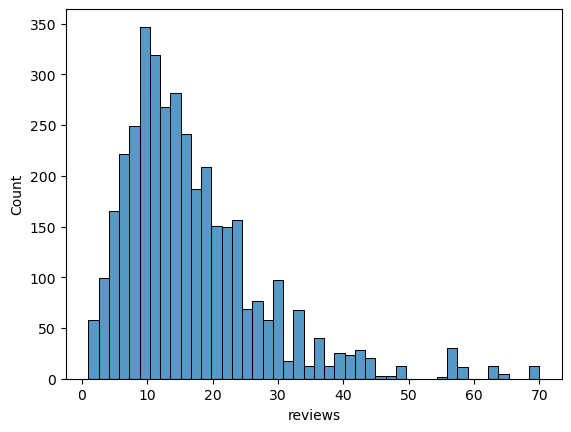

In [224]:
# Make reviews normally distributed

sqrt_reviews = df['reviews']**(1/2)

stat, p = stats.shapiro(sqrt_reviews)
print(p)
sns.histplot(sqrt_reviews)
plt.show()

In [227]:
df['sqrt_reviews'] = df['reviews']**(1/2)

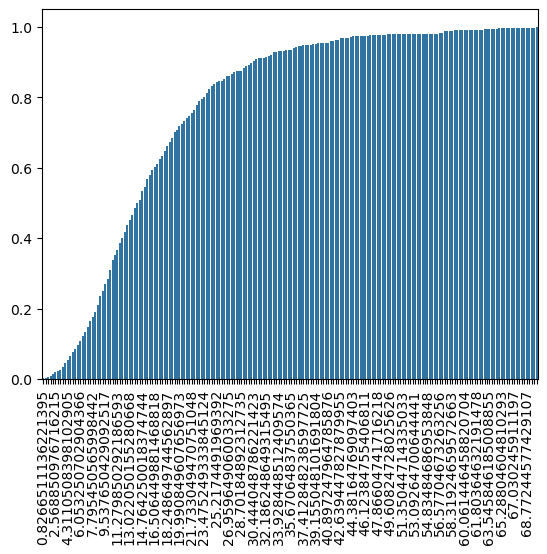

In [231]:
# calculate the cumulative histogram (or cumulative frequency) as an object using scipy function cumfreq
cumfreq = stats.cumfreq(sqrt_reviews, numbins=200)

# extract a list of the bin values
bins = cumfreq.lowerlimit + np.linspace(0, cumfreq.binsize*cumfreq.cumcount.size,cumfreq.cumcount.size)

# extract the counts in each bin
cumcounts = cumfreq.cumcount

# convert the counts into proportions of the entire data (this essentially converts it to a cumulative probability distribution)
cumprop = cumcounts/len(sqrt_reviews)

# plot
bplt = sns.barplot(x=bins,y=cumprop,color='tab:blue')

# suppress labels (or it gets too crowded)
for index, label in enumerate(bplt.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
        
# rotate the labels (since it's still too crowded!)
plt.xticks(rotation=90)
plt.show()

In [249]:
bin_lower = bins[np.where(cumprop <= 0.005)][-1]
bin_upper = bins[np.where(cumprop <= 0.995)][-1]
print([bin_lower, bin_upper])

[1.1750910862409545, 63.545846185008855]


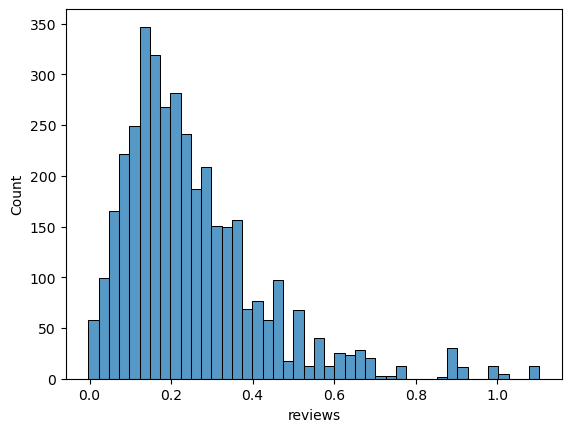

[-0.0028072625698324005, 1.1033659217877092]


In [243]:
#normalize based on upper and lower bounds
reviews_norm = (sqrt_reviews - bin_lower)/(bin_upper - bin_lower)
sns.histplot(reviews_norm)
plt.show()

# min/max after normalization
print([np.min(reviews_norm), np.max(reviews_norm)])

In [251]:
df['reviews_norm'] = reviews_norm

In [ ]:
df.corr()

In [255]:
# Test Pearsons correlation
import scipy

stat, p1 = scipy.stats.pearsonr(df['reviews_norm'], df['total_bikes'])
print(p1)

3.8724396004127853e-39


In [263]:
y = df['bikes']
X = df['reviews_norm']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept, bias
X.head()

,const,reviews_norm
0,1.0,0.568726
1,1.0,0.644165
2,1.0,0.334253
3,1.0,0.243143
4,1.0,0.087512


> As all the P values are less than 0.05, there is a significant correlation. 

Provide model output and an interpretation of the results. 

In [264]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bikes   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.12e-49
Time:                        11:11:24   Log-Likelihood:                -12471.
No. Observations:                3745   AIC:                         2.495e+04
Df Residuals:                    3743   BIC:                         2.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5778      0.192     54.987   

1. *R-squared:* In this output, we can see that the value is 0.057. This means that the model is capable of explaining 5.7% of the patterns in the data. This is not surprusing becuase the correlation between number of bikes at a loaction and reviews of the point was only 0.2
2. *P>|t| (or the p-value):* This regression output shows a p-value of 0, number of reviews does affect number of bikes at a particular location. 
3. *coef:* 9.37. A unit increase in reviews will have a positive impact on number of bikes at a location

# Stretch

How can you turn the regression model into a classification model?

1. I would categorize number of reviews into bins to reflect popularity say number of reviews less than 500 is less popular and 500 above is popular. 
2. Build a logistic regression model for number of bikes and popularity
3. for a locaton with a given number of bikes, our model can tell if the place is/ will be popular or not. 